<div style="text-align: justify">

## Description
The Titanic dataset is a well-known collection of information about passengers on the Titanic, the ship that famously sank in 1912. It includes details such as age, gender, class, and whether the passengers survived the disaster.

## Research Question:

What factors most significantly influence a person's likelihood of surviving the sinking of the Titanic?

## Objectives:

1) Develop a predictive model that can classify Titanic passengers into two categories: survivors and non-survivors.

2) Identify and analyze key factors that contribute to the survival odds of passengers, which may include socio-economic status, age, gender, and more.

## Study Units
In terms of statistics, each person on the ship serves as a unit.

## Key Features
The features in this dataset, such as passenger class, gender, and age, are the key to understanding who was more likely to survive.

## Data Collection and Availability
The data for this dataset were collected after the sinking of the Titanic. They have been cleaned and organized and are now available on Kaggle, a website that offers datasets for data science projects. Many people use this particular dataset to practice data analysis and machine learning.

https://www.kaggle.com/datasets/ibooth1/titanic3

</div>



## Features in the dataset
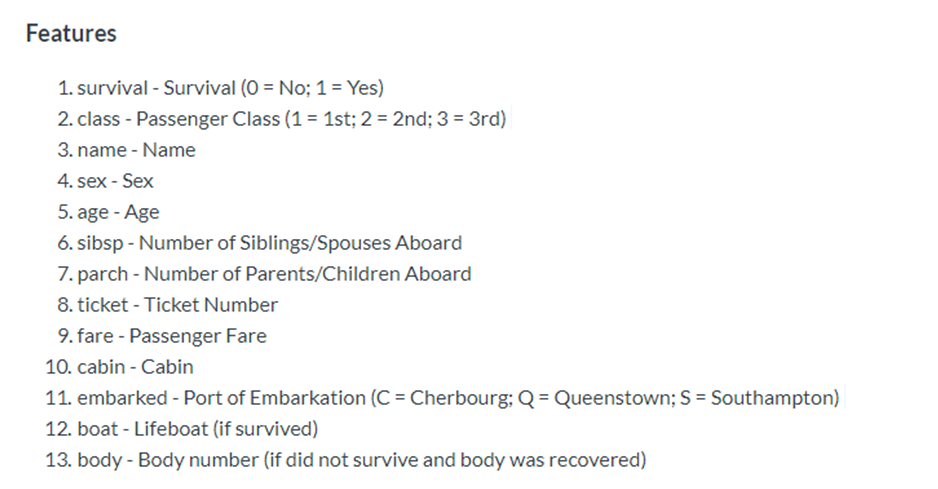

## Exploratory Analysis

In [13]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

################ Imports for Machine learning models##############
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [14]:
# Load the Titanic dataset to examine the available columns and conduct an initial analysis
df = pd.read_excel('titanic3.xls')

#Show the firs lines
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [15]:
# Display the data types of each column to understand what kind of data we are working with.
print(df.dtypes)

# Determine the size of the dataset to know how many observations and features we have.
# This is helpful to get an idea of the dataset's scope and to plan data preprocessing.
dataset_dimensions = df.shape
print(f"\nThe dataset contains {dataset_dimensions[0]} rows and {dataset_dimensions[1]} columns.")

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

The dataset contains 1309 rows and 14 columns.


In [16]:
#Lets see how many different values and also the number of missing values has each column in the dataset
print("Count of Unique Values Per Column:")
print(df.nunique())

print("\nCount of Missing Values Per Column:")
print(df.isna().sum())

Count of Unique Values Per Column:
pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        939
fare          281
cabin         186
embarked        3
boat           28
body          121
home.dest     369
dtype: int64

Count of Missing Values Per Column:
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


<div style="text-align: justify">

* Since the 'body' and 'boat' columns are only identified post-accident, it can be removed as it does not aid in predictive analysis.

* The 'cabin' column also can be removed due to an excessive amount of missing values, which could introduce significant bias.

* The columns 'name','ticket' and 'home.dest' column does not hold relevance for this analysis.

* The 'fare' and 'embarked' columns have very few missing values, so we can remove the entire rows where these are missing.

* A new column named 'familysize' will be created by summing the 'sibsp' (number of siblings/spouses aboard) and 'parch' (number of parents/children aboard) columns, plus 1 to account for the passenger themselves. This column will provide a comprehensive view of the size of each passenger's family aboard the Titanic.

* Additionally, we will further examine the 'age' column to determine if imputation is a viable approach for handling missing values.

</div>



In [17]:
#Create the column familisize
df['familysize'] = df['sibsp'] + df['parch'] + 1
# drop the columns  cabin, boat,body,home.dest
df = df.drop(['body','boat', 'cabin', 'name', 'ticket', 'home.dest', 'sibsp','parch'], axis=1)
print("Columns in the dataset", df.columns)

Columns in the dataset Index(['pclass', 'survived', 'sex', 'age', 'fare', 'embarked', 'familysize'], dtype='object')


In [18]:
#Remove the entire row with NA in columns fare and embarked
df = df.dropna(subset=['fare', 'embarked'])

#Show the new number of rows and columns
print(f"\n The new shape of the dataset is  ",df.shape[0], "rows, and ",df.shape[1], " columns" )


 The new shape of the dataset is   1306 rows, and  7  columns


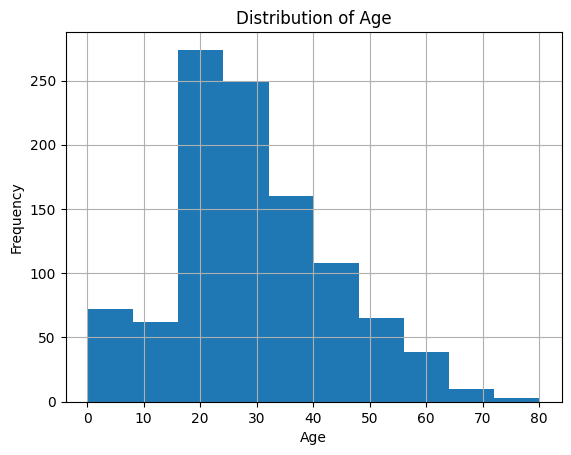

In [19]:
##### Inputation for the 'age' column

# Create a histogram of the 'age' column, excluding missing values
df['age'].dropna().hist(bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


The histogram of the 'age' distribution shows a right skew. Given this skewness, median imputation is recommended for missing values, as the median is less affected by extreme values and will preserve the original distribution shape better than the mean. This approach ensures a more accurate representation of the dataset's central tendency without the distortion that outliers might cause.

In [20]:
#Lets calculate the median
median_age = df['age'].median()
print(f"Median age: {median_age}")

#then replace the NA with the value of the median
df['age'].fillna(median_age, inplace=True)

# Verify the replacement by checking the count of missing values again.
# After this operation, we expect the count of missing values for 'age' to be zero.
print("\nCount of Missing Values by Column after Replacement:")
print(df.isna().sum())

Median age: 28.0

Count of Missing Values by Column after Replacement:
pclass        0
survived      0
sex           0
age           0
fare          0
embarked      0
familysize    0
dtype: int64


In [21]:
# Print the first 10 rows of the cleaned dataset to check the current state of the data.
print("Preview of the Cleaned Dataset (First 10 Rows):")
print(df.head(10))

# Review the Dimensions of the Cleaned Dataset
# Print the dimensions of the dataset to confirm the current number of rows and columns.
print("\nDimensions of the Cleaned Dataset:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Preview of the Cleaned Dataset (First 10 Rows):
   pclass  survived     sex      age      fare embarked  familysize
0       1         1  female  29.0000  211.3375        S           1
1       1         1    male   0.9167  151.5500        S           4
2       1         0  female   2.0000  151.5500        S           4
3       1         0    male  30.0000  151.5500        S           4
4       1         0  female  25.0000  151.5500        S           4
5       1         1    male  48.0000   26.5500        S           1
6       1         1  female  63.0000   77.9583        S           2
7       1         0    male  39.0000    0.0000        S           1
8       1         1  female  53.0000   51.4792        S           3
9       1         0    male  71.0000   49.5042        C           1

Dimensions of the Cleaned Dataset:
Rows: 1306, Columns: 7


## Data Dictionary

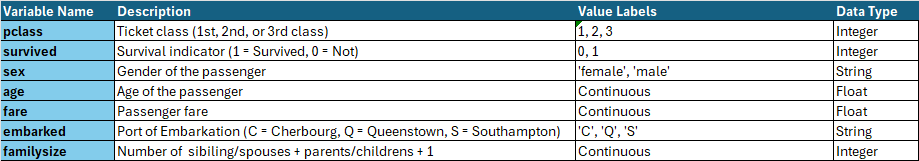

## Descriptive Analysis (One variable)
The descriptive analysis section offers a closer look at our dataset, showcasing important statistics and trends across different variables. Here, we’ll uncover patterns that help us understand the background of the Titanic's passengers before we move on to prediction.




In [22]:
#Change pclass and survived to category
# After the conversion, these columns will be treated as categorical variables by pandas,
df['pclass'] = df['pclass'].astype('category')
df['survived'] = df['survived'].astype('category')

#### Categorical Variables

#### Class

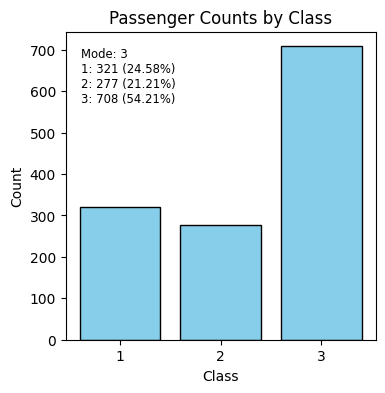

In [23]:
# Count 'pclass' values and sort by index
counts = df['pclass'].value_counts().sort_index()

# Calculate percentages for each 'pclass'
total_counts = counts.sum()
percentages = (counts / total_counts) * 100

# Calculate the mode for 'pclass'
mode = df['pclass'].mode()[0]

# Creating the Plot
# ======================

# Set the figure size
plt.figure(figsize=(4, 4))

# Create the bar chart
bars = plt.bar(counts.index.astype(str), counts.values, color='skyblue', edgecolor='black')

# Titles and labels
plt.title('Passenger Counts by Class')
plt.xlabel('Class')
plt.ylabel('Count')

# Annotations on the Plot
# ==========================

# Constructing the annotations text: Mode, Counts, and Percentages
annotations = f'Mode: {mode}\n' + '\n'.join(
    [f'{idx}: {val} ({percent:.2f}%)' for idx, val, percent in zip(counts.index, counts, percentages)]
)

# Positioning the text in the top-left corner
plt.text(0.05, 0.95, annotations, transform=plt.gca().transAxes, ha='left', fontsize='small', verticalalignment='top')

# Display the plot
plt.show()




* The majority of passengers were in 3rd class, with 708 passengers making up 54.21% of the total.
1st class had 321 passengers, which is 24.58% of the passengers.
2nd class had the fewest passengers, with 277 or 21.21% of the total.


---



#### Survived

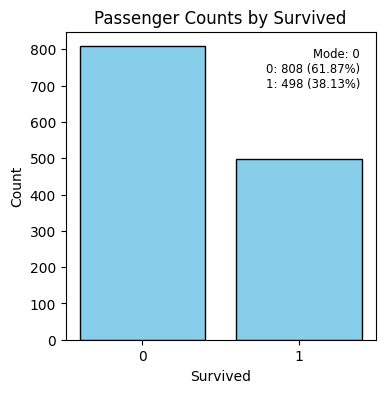

In [24]:
# Count 'survived' values and sort by index
counts = df['survived'].value_counts().sort_index()

# Calculate percentages for each 'survived'
total_counts = counts.sum()
percentages = (counts / total_counts) * 100

# Calculate the mode for 'survived'
mode = df['survived'].mode()[0]

# Creating the Plot
# ======================

# Set the figure size
plt.figure(figsize=(4, 4))

# Create the bar chart
bars = plt.bar(counts.index.astype(str), counts.values, color='skyblue', edgecolor='black')

# Titles and labels
plt.title('Passenger Counts by Survived')
plt.xlabel('Survived')
plt.ylabel('Count')

# Annotations on the Plot
# ==========================

# Constructing the annotations text: Mode, Counts, and Percentages
annotations = f'Mode: {mode}\n' + '\n'.join(
    [f'{idx}: {val} ({percent:.2f}%)' for idx, val, percent in zip(counts.index, counts, percentages)]
)

# Positioning the text in the top-left corner
plt.text(0.95, 0.95, annotations, transform=plt.gca().transAxes, ha='right', fontsize='small', verticalalignment='top')

# Display the plot
plt.show()


* A total of 808 passengers, or 61.87%, did not survive (represented by the bar labeled '0'). There were 498 survivors (38.13%) of the passengers (represented by the bar labeled '1').


---



#### Sex

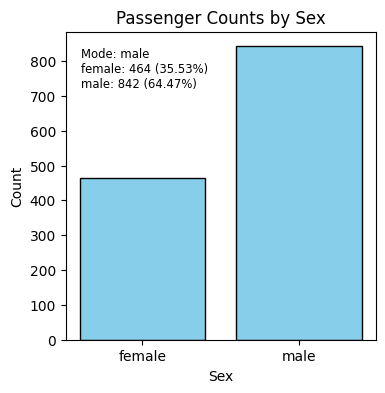

In [25]:
# Count 'sex' values and sort by index
counts = df['sex'].value_counts().sort_index()

# Calculate percentages for each 'sex'
total_counts = counts.sum()
percentages = (counts / total_counts) * 100

# Calculate the mode for 'sex'
mode = df['sex'].mode()[0]

# Creating the Plot
# ======================

# Set the figure size
plt.figure(figsize=(4, 4))

# Create the bar chart
bars = plt.bar(counts.index.astype(str), counts.values, color='skyblue', edgecolor='black')

# Titles and labels
plt.title('Passenger Counts by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

# Annotations on the Plot
# ==========================

# Constructing the annotations text: Mode, Counts, and Percentages
annotations = f'Mode: {mode}\n' + '\n'.join(
    [f'{idx}: {val} ({percent:.2f}%)' for idx, val, percent in zip(counts.index, counts, percentages)]
)

# Positioning the text in the top-left corner
plt.text(0.05, 0.95, annotations, transform=plt.gca().transAxes, ha='left', fontsize='small', verticalalignment='top')

# Display the plot
plt.show()


* There were nearly twice as many men as there were women, with 842 males accounting for 64.47% and 464 females making up 35.53% of the total


---



#### embarked

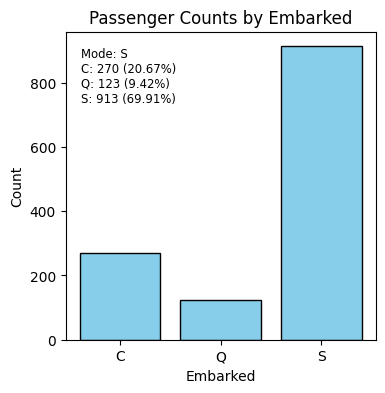

In [26]:
# Count 'embarked' values and sort by index
counts = df['embarked'].value_counts().sort_index()

# Calculate percentages for each 'embarked'
total_counts = counts.sum()
percentages = (counts / total_counts) * 100

# Calculate the mode for 'embarked'
mode = df['embarked'].mode()[0]

# Creating the Plot
# ======================

# Set the figure size
plt.figure(figsize=(4, 4))

# Create the bar chart
bars = plt.bar(counts.index.astype(str), counts.values, color='skyblue', edgecolor='black')

# Titles and labels
plt.title('Passenger Counts by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')

# Annotations on the Plot
# ==========================

# Constructing the annotations text: Mode, Counts, and Percentages
annotations = f'Mode: {mode}\n' + '\n'.join(
    [f'{idx}: {val} ({percent:.2f}%)' for idx, val, percent in zip(counts.index, counts, percentages)]
)

# Positioning the text in the top-left corner
plt.text(0.05, 0.95, annotations, transform=plt.gca().transAxes, ha='left', fontsize='small', verticalalignment='top')

# Display the plot
plt.show()


* A predominant 69.91% (913 passengers) boarded at Southampton (S), making it the most common embarkation point.
* Cherbourg (C) saw 20.67% of passengers (270 people) commence their journey.
* Queenstown (Q) had the fewest boarders, with 9.42% (123 passengers).
* The mode for embarkation is S, denoting Southampton as the port where the majority embarked.



---



### Numerical variables


#### Age

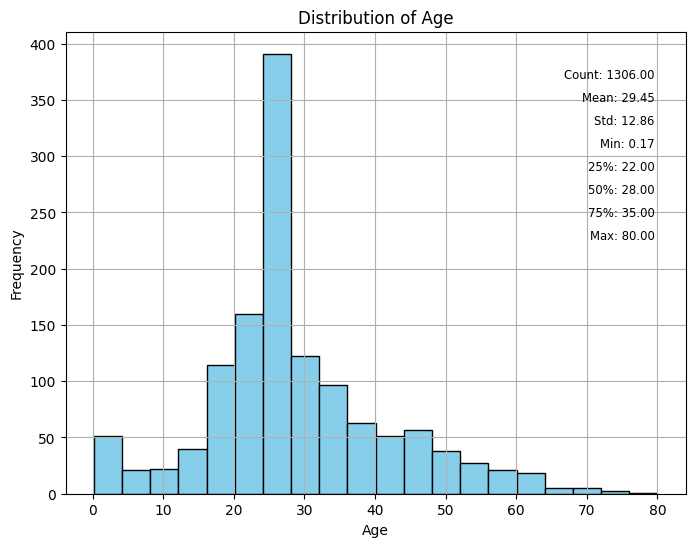

In [27]:
# Calculate descriptive statistics for the 'age' variable
age_stats = df['age'].describe()

# Create a histogram for the 'age' variable
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

# Show descriptive statistics on the plot
for stat, value in age_stats.items():
    plt.text(0.95, 0.9 - 0.05 * age_stats.index.get_loc(stat), f'{stat.capitalize()}: {value:.2f}',
             transform=plt.gca().transAxes, ha='right', fontsize='small')

plt.show()

* The total count of passengers for whom age data is available is 1,306.
* The average (mean) age is approximately 29.45 years.

* The youngest passenger is around 0.17 years old, indicating the presence of infants, and the oldest passenger is 80 years old.
* The ages of the passengers are spread such that 25% are below 22 years old, 50% (the median) are below 28 years old, and 75% are below 35 years old.


---

#### Family Size


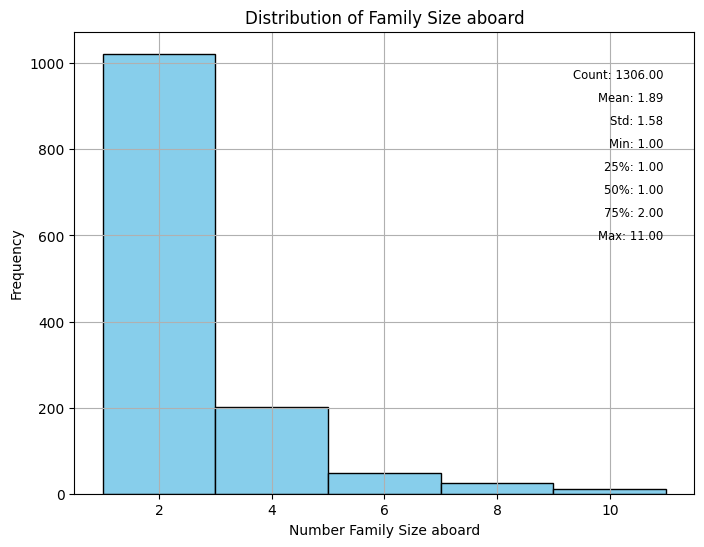

In [28]:
# Calculate descriptive statistics for the 'familysize' variable
sibsp_stats = df['familysize'].describe()

# Create a histogram for the 'familysize' variable
plt.figure(figsize=(8, 6))
plt.hist(df['familysize'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Family Size aboard')
plt.xlabel('Number Family Size aboard')
plt.ylabel('Frequency')
plt.grid(True)

# Show descriptive statistics on the plot
for stat, value in sibsp_stats.items():
    plt.text(0.95, 0.9 - 0.05 * age_stats.index.get_loc(stat), f'{stat.capitalize()}: {value:.2f}',
             transform=plt.gca().transAxes, ha='right', fontsize='small')

plt.show()


* The average family size aboard was about 2 (1.89) individuals.
* The smallest family size observed is 1 (traveling alone).
* The 25th percentile is also 1, showing that at least 25% of passengers were traveling alone.
* The median (50th percentile) family size is 1, which suggests that at least half of the passengers were traveling alone.
* The 75th percentile is 2, indicating that 75% of passengers had a family size of 2 or less.
* The largest family size aboard was 11 individuals.


---

#### Fare

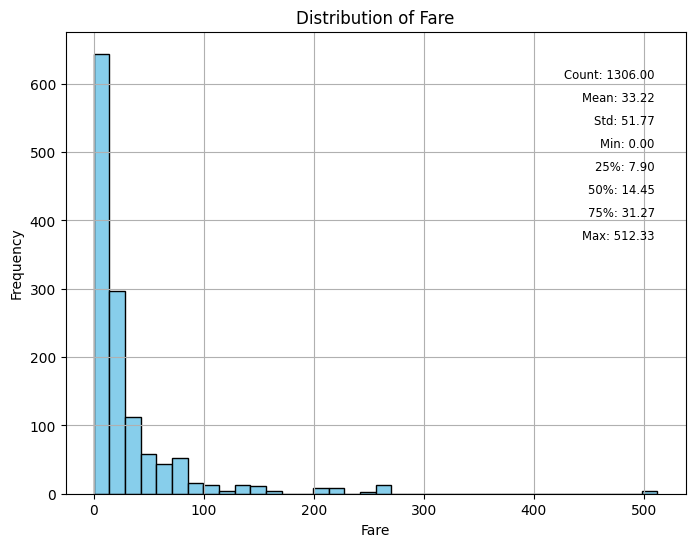

In [29]:
# Calculate descriptive statistics for the 'fare' variable
fare_stats = df['fare'].describe()

# Create a histogram for the 'fare' variable
plt.figure(figsize=(8, 6))
plt.hist(df['fare'], bins=36, color='skyblue', edgecolor='black')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(True)

# Show descriptive statistics on the plot
for stat, value in fare_stats.items():
    plt.text(0.95, 0.9 - 0.05 * fare_stats.index.get_loc(stat), f'{stat.capitalize()}: {value:.2f}',
             transform=plt.gca().transAxes, ha='right', fontsize='small')

plt.show()




* From the 1,306 passengers considered, the average fare was approximately 33.22.
* There is a considerable spread in fares, as indicated by the standard deviation of 51.77.
* The minimum fare is 0.00,  maybe crew members, or promotional tickets.
* The median fare is 14.45, meaning that half of the passengers paid less than this fare.
* The maximum fare is 512.33 (outlier).
* The distribution is right-skewed, passengers payd lower fares



---



### Relational Analysis  (Two Variables)

In [30]:
# Create a copy of the DataFrame df and assign it to df_ra (relational analysis)
df_ra = df.copy()

In [31]:
# These columns are categorical but represented in a way that is naturally ordinal and numeric.
df_ra['pclass'] = df_ra['pclass'].astype(int)
df_ra['survived'] = df_ra['survived'].astype(int)

# Encode 'sex' column to binary numeric values
# Female is encoded as 0, and Male as 1, making it easier for models to interpret.
# This process is known as label encoding, where each category is assigned a unique integer.
df_ra['sex'] = df_ra['sex'].map({'female': 0, 'male': 1})

# Display the first few rows of the modified DataFrame to verify the changes
df_ra.head()


,pclass,survived,sex,age,fare,embarked,familysize
0,1,1,0,29.0000,211.3375,S,1
1,1,1,1,0.9167,151.5500,S,4
2,1,0,0,2.0000,151.5500,S,4
3,1,0,1,30.0000,151.5500,S,4
4,1,0,0,25.0000,151.5500,S,4


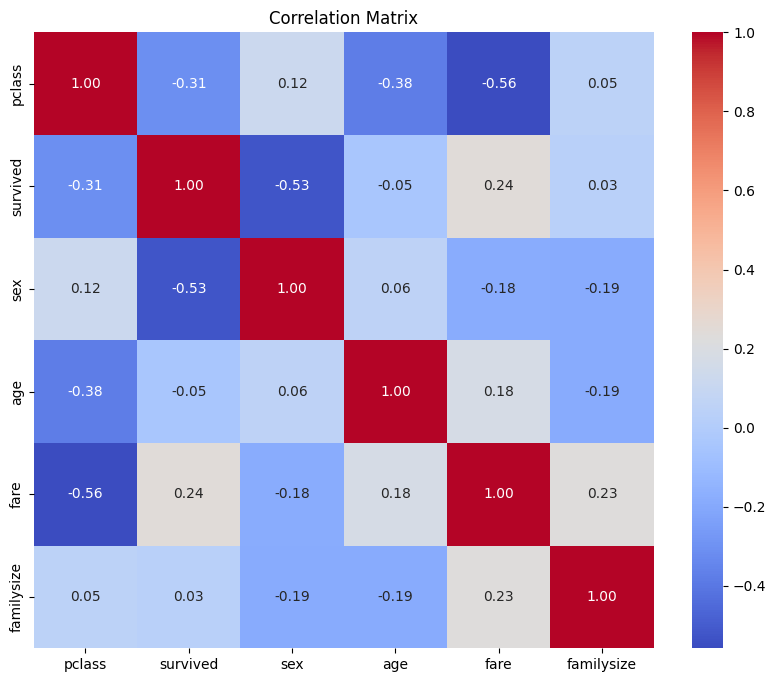

In [32]:
# Calculating the Correlation Matrix
# ===================================

# The correlation matrix is a powerful tool to understand the linear relationships between the numerical variables.
# It calculates the Pearson correlation coefficients that range from -1 to 1, where:
# - 1 indicates a perfect positive linear relationship,
# - -1 indicates a perfect negative linear relationship, and
# - 0 indicates no linear relationship.

correlation_matrix = df_ra.corr(numeric_only=True)
# 'numeric_only=True' ensures that the correlation is calculated only for numerical columns.

# Generating a Heatmap
# =====================

# A heatmap is an effective way to visualize the correlation matrix.
#  It helps in quickly identifying highly correlated variables

plt.figure(figsize=(10, 8))  # Setting the size of the heatmap for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# 'annot=True' displays the correlation values in each cell
# 'cmap' defines the color scheme as 'coolwarm'
# 'fmt=".2f"' formats the annotation to two decimal places

plt.title('Correlation Matrix')  # Adding a title for clarity
plt.show()  # Displaying the heatmap

#### Correlation Matrix Analysis

* pclass and fare show a strong negative correlation of approximately -0.56, suggesting that as the class number increases (from first class to third class), the fare tends to decrease.

* There's a negative correlation of about -0.53 between sex and survived, indicating that within this dataset, one group had lower survival rates compared to the other.

* age appears to have a slight negative correlation with pclass (around -0.38), indicating that individuals in higher classes (lower pclass numbers) tend to be older.

* The absence of strong correlations involving familySize might indicate that family size alone wasn't a decisive factor for survival or fare.

* There are no strong correlations observed between age and survived, sex and age, or age and sibsp, with all values close to zero.

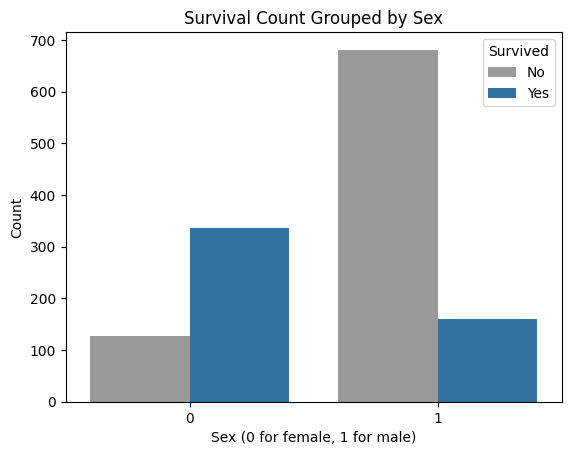

In [33]:
# Create a count plot with 'sex' on the x-axis and the count of 'survived' on the y-axis
# Define custom colors
colors = ['#999999', '#1f77b4']  # Gray for 0 (No survived) Blue 1 (Survived)

# Create the bar chart
# 'sns.countplot' automatically counts the occurrences of each category, making it ideal for this kind of visualization.
sns.countplot(x='sex', hue='survived', data=df_ra, palette=colors)  # Using Tomato for "No" and SteelBlue for "Yes"

# Label your axes and add a title
plt.xlabel('Sex (0 for female, 1 for male)')
plt.ylabel('Count')
plt.title('Survival Count Grouped by Sex')
plt.legend(title='Survived', labels=['No', 'Yes'])

# Display the plot
plt.show()


The bar chart illustrates survival rates on the Titanic by gender. It shows that although there were more males aboard, females had a higher survival rate. There is a substantially higher mortality count for males compared to females, indicating females were more likely to survive the disaster


---



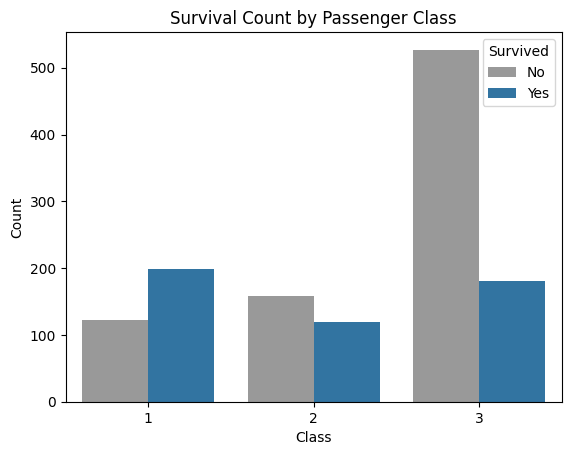

In [34]:
sns.countplot(x='pclass', hue='survived', data=df_ra, palette=colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Survival Count by Passenger Class')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()




The survival rate for third class is lower, with a higher count of passengers not surviving. In contrast, first-class passengers had the highest survival rate, as the blue bar for first class is taller than the grey bar, indicating more survivors than non-survivors in that class. Second class has a more balanced ratio of survivors to non-survivors, but still with fewer survivors compared to those who did not survive.

---



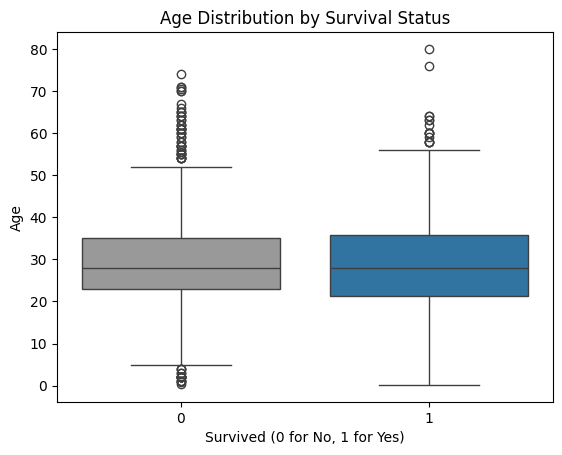

In [35]:
# The boxplot is an excellent tool for visualizing the distribution of ages within each survival status group.
# It helps identify the median, quartiles, and potential outliers within each category.

# 'x='survived'' sets the categories for comparison, and 'y='age'' is the numerical variable we're analyzing.
sns.boxplot(x='survived', y='age', hue='survived', data=df_ra, palette=colors, legend=False)


# Labeling the plot for clarity
# The labels clearly indicate what '0' and '1' represent in terms of survival, and the y-axis represents the age of passengers.
plt.xlabel('Survived (0 for No, 1 for Yes)')
plt.ylabel('Age')
plt.title('Age Distribution by Survival Status')

# Display the plot
plt.show()

The chart seems to show that the middle age of people who lived is about the same as those who didn't. Both surviving and non-surviving groups include people from very young to very old. The lines sticking out from the boxes tell us how wide the age range is for most people. The dots are ages that are not common. There are more unusual ages among those who didn't make it, which means there were either very young or very old people who didn't survive.



---



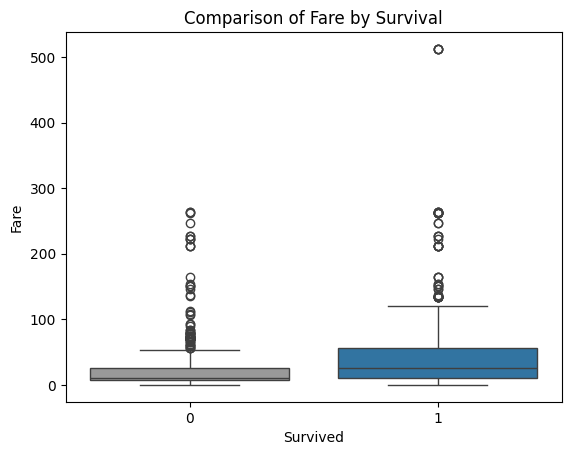

In [36]:
#sns.boxplot(x='survived', y='fare', data=df_model, palette=colors)
sns.boxplot(x='survived', y='fare', hue='survived', data=df_ra, palette=colors, legend=False)

# Labeling the plot for clarity
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Comparison of Fare by Survival')

# Display the plot
plt.show()

The grey box (non-survivors) shows that most paid a lower fare, with the median fare being quite low, and not many paying higher amounts. There are a few dots far above the box, which represent people who paid a lot more than average, but these are not common.

For the survivors, represented by the blue box, the fares are generally higher. The median fare is above that of the non-survivors, indicating that on average, those who survived paid more. This box also has dots above it, showing that some survivors paid very high fares, but again, these are unusual cases.

The chart suggests that paying a higher fare may have given passengers a better chance of survival on the Titanic.


---



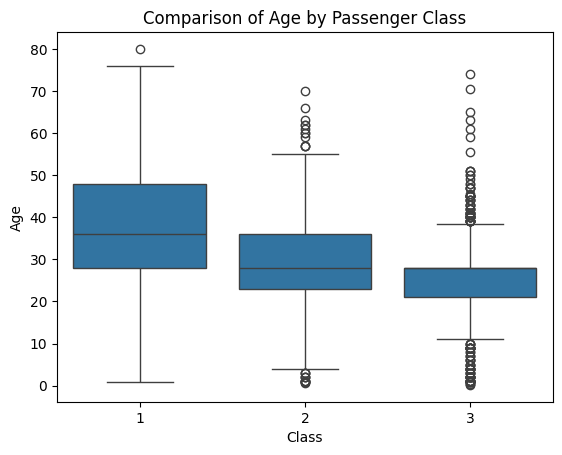

In [37]:
sns.boxplot(x='pclass', y='age', data=df_ra)
plt.xlabel('Class')
plt.ylabel('Age')
plt.title('Comparison of Age by Passenger Class')
plt.show()


The first-class box (on the left) is high and has a higher median age than the other classes, suggesting that older passengers tended to travel in first class. It also has outliers indicating some very young or very old passengers.

The second-class box is in the middle and has a lower median age than first class but higher than third class. It also has a few outliers, showing a range of ages.

The third-class box (on the right) is the lowest, with the youngest median age, indicating that it had younger passengers on average. There are many dots at the bottom, which are younger outliers, and a few at the top, showing a broad range of ages but skewed towards younger passengers.

Overall, the chart indicates that passengers in higher classes tended to be older, while third class attracted a younger crowd.



---



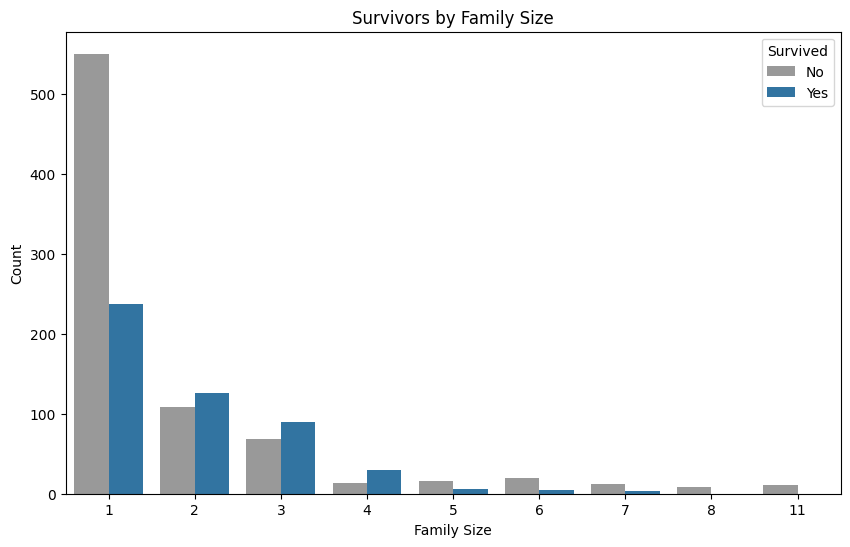

In [38]:
# Bar Chart of Survivors by Family Size.

plt.figure(figsize=(10, 6))
sns.countplot(x='familysize', hue='survived', data=df_ra, palette=colors)
plt.title('Survivors by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()



The chart shows that individuals with a family size of 1 had the highest count of non-survivors and a lower count of survivors. As family size increases to 2 and 3, the number of survivors is higher relative to the number of non-survivors. However, from family sizes of 4 and above, the count of survivors drops considerably, and the count of non-survivors also decreases but not as sharply.

Large family sizes (more than 3 members) have very few survivors, which could suggest that it was more difficult for larger families to secure a place in lifeboats or manage evacuation efficiently. Small to medium-sized families (2-3 members) seemed to have a better chance of survival. Individuals traveling alone or in very large groups had a lower survival rate.



---



### Predictive Modeling

In this dataset, __logistic regression__ is suitable due to its ability to predict binary outcomes. Since the goal involves predicting survival (yes/no), logistic regression is ideal for estimating the probability of survival based on various predictor variables. It provides interpretable coefficients, making it easy to understand the impact of each predictor on the likelihood of survival. Additionally, logistic regression assumes a linear relationship between the log odds of the outcome and the predictors, making it a straightforward and effective choice for binary classification problems like survival prediction.







---


**One-hot encoding**
is used in logistic regression to convert categorical variables into a numerical format. This allows the model to interpret categorical data, improving its ability to capture relationships between predictors and the target variable.

In [42]:
# Create a copy of the DataFrame df and assign it to df_ra (predictive analysis)
df_pa = df_ra.copy()

In [43]:
# One-hot encode 'pclass' with separate columns for each class, dropping the first category
df_pa = pd.get_dummies(df_pa, columns=['pclass'], prefix='class', drop_first=True)

# One-hot encode 'embarked', dropping the first category to avoid dummy variable trap
df_pa = pd.get_dummies(df_pa, columns=['embarked'], drop_first=True)

# This reduces redundancy and simplifies interpretation by representing each category relative to a baseline.

df_pa.head()

,survived,sex,age,fare,familysize,class_2,class_3,embarked_Q,embarked_S
0,1,0,29.0000,211.3375,1,0,0,0,1
1,1,1,0.9167,151.5500,4,0,0,0,1
2,0,0,2.0000,151.5500,4,0,0,0,1
3,0,1,30.0000,151.5500,4,0,0,0,1
4,0,0,25.0000,151.5500,4,0,0,0,1


In [44]:
from sklearn.preprocessing import StandardScaler
# Create an instance of the scaler
scaler = StandardScaler()

# Scale the numerical columns
columns_to_scale = ['age', 'fare', 'familysize']
df_pa[columns_to_scale] = scaler.fit_transform(df_pa[columns_to_scale])

#Show the firs rows of the dataset
df_pa.head()

,survived,sex,age,fare,familysize,class_2,class_3,embarked_Q,embarked_S
0,1,0,-0.034861,3.442063,-0.559187,0,0,0,1
1,1,1,-2.219833,2.286663,1.334413,0,0,0,1
2,0,0,-2.135549,2.286663,1.334413,0,0,0,1
3,0,1,0.042943,2.286663,1.334413,0,0,0,1
4,0,0,-0.346074,2.286663,1.334413,0,0,0,1



It is normal for the values of some variables to become negative after applying standardization to the data. Standardization centers the data around zero and scales the values so that they have a mean of zero and a standard deviation of one. This means that values which were originally above the mean will be positive after standardization, while values below the mean will be negative.



---



##### Data Splitting:
Divide the dataset into a training set and a test set. The training set will be used to train the model, while the test set will be used to evaluate its performance.

In [45]:
# Split the dataset into features (X) and the target variable (y)
X = df_pa.drop('survived', axis=1)  # Adjust the column name of the target variable as needed
y = df_pa['survived']  # Adjust the column name of the target variable as needed

# Split the dataset into training and test sets (e.g., 80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#### Training the model

In [46]:
# Instantiate the logistic regression model
# Logistic Regression is a widely used statistical method for predicting binary outcomes.
model = LogisticRegression()

# Train the model using the training data
# The 'fit' method is used to train the model on the training dataset,
# with 'X_train' containing the features and 'y_train' containing the target variable.
model.fit(X_train, y_train)


LogisticRegression()

#### Making predictions and calculate the model's accuracy

In [47]:
# Making predictions on the test set
# The 'predict' method is used to generate predictions for the test dataset,
# which can then be compared to the actual outcomes to evaluate the model's performance.
y_pred = model.predict(X_test)

# Import necessary metrics for evaluating model performance
from sklearn.metrics import accuracy_score, classification_report

# Calculate the model's accuracy
# Accuracy is the proportion of correct predictions among the total number of cases evaluated.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the classification report
# The classification report includes key metrics in classification tasks:
# precision, recall, f1-score, and support for each class.
print(classification_report(y_test, y_pred))


Accuracy: 0.7748091603053435
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       154
           1       0.74      0.69      0.72       108

    accuracy                           0.77       262
   macro avg       0.77      0.76      0.77       262
weighted avg       0.77      0.77      0.77       262



* Accuracy: Approximately 77.48% of the predictions made by your model are correct. This is the proportion of true results (both true positives and true negatives) in the total number of cases examined.

* Precision for Class 0: About 80% of the predictions made by your model for class 0 (presumably the non-survivors) are correct. This means when it predicts a passenger did not survive, it's correct 80% of the time.

* Recall for Class 0: Your model correctly identifies 83% of all actual class 0 instances. So, it catches 83% of the passengers who actually did not survive.

* F1-Score for Class 0: The F1-score for class 0 is 0.81, which is a balance between precision and recall. This score is a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

* Precision for Class 1: For class 1 (presumably the survivors), the precision is 74%, meaning when the model predicts a passenger survived, it's correct 74% of the time.

* Recall for Class 1: The recall for class 1 is 69%, indicating that the model correctly identifies 69% of the actual survivors.

* F1-Score for Class 1: The F1-score for class 1 is 0.72, which again balances precision and recall for the survivors.


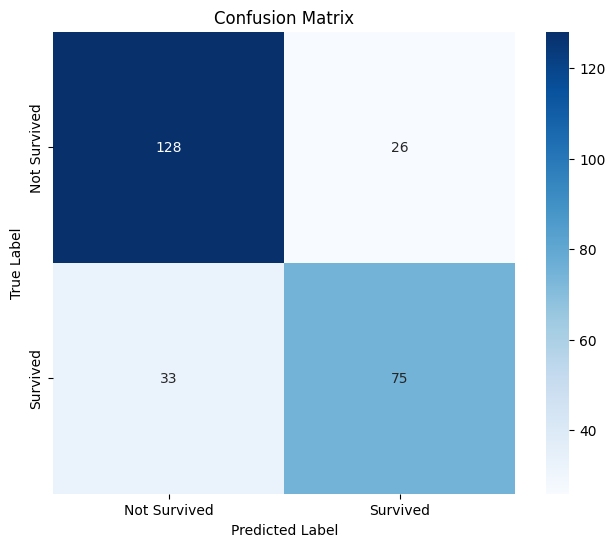

In [89]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


This confusion matrix provides a visual representation of your logistic regression model's performance on the Titanic survival prediction task.

The top left square (dark blue) shows the true negatives (TN): 128 passengers were correctly predicted as not survived.
The bottom right square (light blue) shows the true positives (TP): 75 passengers were correctly predicted as survived.
The top right square shows the false positives (FP): 26 passengers were incorrectly predicted as survived when they did not.
The bottom left square shows the false negatives (FN): 33 passengers were incorrectly predicted as not survived when they actually did.
The matrix suggests that the model is better at correctly identifying passengers who did not survive than those who did. However, there are still a notable number of false negatives and false positives. The model's precision and recall can be evaluated based on these numbers, potentially indicating areas where the model might be improved.

#### Analyze Model Feature Influence

In [48]:
# The coefficients are in model.coef_, and for logistic regression, it's a 1D array if you're doing binary classification
coefficients = model.coef_[0]

# If you have the feature names available, it's a good idea to map these to the coefficients.
feature_names = X_train.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# To interpret the importance, it's often helpful to look at the absolute values of the coefficients
feature_importance['Absolute Value'] = feature_importance['Coefficient'].abs()

# Now sort the features by the absolute values of their coefficients to see the most influential features
feature_importance.sort_values(by='Absolute Value', ascending=False, inplace=True)

# Display the feature importances
print(feature_importance)

      Feature  Coefficient  Absolute Value
0         sex    -2.596540        2.596540
5     class_3    -1.852021        1.852021
4     class_2    -0.931545        0.931545
7  embarked_S    -0.669407        0.669407
6  embarked_Q    -0.668349        0.668349
1         age    -0.387945        0.387945
3  familysize    -0.252819        0.252819
2        fare     0.012169        0.012169


Based on the coefficients, the variable that most significantly affects survival is 'sex,' with females being much more likely to survive than males. The 'class_3' variable is next in importance, indicating that passengers in third class had a substantially lower chance of survival.

When the coefficient is negative, it means that as the value of that feature increases, the chance of the event happening decreases. So, if a feature like 'class_3' has a negative coefficient, it means that being in third class lowers the chance of surviving.


---



## Conclusion:

Based on the analysis conducted in this project, it's evident that gender and socio-economic status were the most significant factors influencing the survival odds of passengers on the Titanic. Females had a notably higher survival rate compared to males, highlighting the impact of the "women and children first" policy. Additionally, passengers in first class had better survival chances than those in lower classes, pointing to socio-economic status as a crucial determinant. While age and family size also played roles, their impact was less pronounced than gender and class.

The logistic regression model developed in this project demonstrated well performance with an overall accuracy of approximately 77.48%, effectively capturing the likelihood of survival for passengers on the Titanic. The model's ability to identify non-survivors was particularly strong.


### References

* Isaac K. Booth (n.d.). Titanic Dataset. Retrieved from https://www.kaggle.com/datasets/ibooth1/titanic3.


* Rojas Garrido, N. (2024, March 16). [Taller gratuito 5 pasos para hacer un análisis estadístico en SPSS]. Presented at Estudio Varianza https://www.estudiovarianza.com/.


* Quezada B., C. (2022, February 22). Mastering Python graphics with Matplotlib and Seaborn [Blog post]. Retrieved from https://cesarquezadab.com/2022/02/22/dominando-graficos-en-python-con-matplotlib-y-seaborn/

* Gedeck, Peter, Bruce, Andrew, Bruce, Peter. (2020). Practical statistics for data scientists : 50+ essential concepts using r and python (Second Edition). : O\'Reilly.

